In [1]:
# So for this model, the idea behind it is we use all three datasets to actually train the model 
# I hope we can get more datasets from Eric, but for now, we will use the three datasets we have
# We also use the first to predict and test how the model performs
# DISCLAIMER: Before i combined all three datasets, I trained on the first two datasets and tested on the third dataset
# The results were almost the same, so I combined them and now have an actual model 

In [2]:
# Here I extract the binned data, the binned data controls which pings end up grapping in the Stave File



import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df_binned = pd.read_parquet('JSF_BINNED_Extract.parquet')
df_binned2 = pd.read_parquet('JSF_BINNED02_Extract.parquet')
df_binned3 = pd.read_parquet('JSF_BINNED03_Extract.parquet')


# Column Names are pingNum	channel	angleScaleFactor	twoWay	angle
minPingBinned = df_binned.pingNum.min()
maxPingBinned = df_binned.pingNum.max()
binnedAmount = maxPingBinned - minPingBinned


minPingBinned2 = df_binned2.pingNum.min()
maxPingBinned2 = df_binned2.pingNum.max()
binnedAmount2 = maxPingBinned2 - minPingBinned2

minPingBinned3 = df_binned3.pingNum.min()
maxPingBinned3 = df_binned3.pingNum.max()
binnedAmount3 = maxPingBinned3 - minPingBinned3

total_amount = binnedAmount + binnedAmount2 + binnedAmount3

df_binned = df_binned[df_binned['pingNum'] > minPingBinned]
df_binned = df_binned[df_binned['pingNum'] <= maxPingBinned]
df_binned = df_binned[df_binned['channel'] == 0]
# df_binned = df_binned[['twoWay']]
df_binned = df_binned.reset_index(drop=True)
print(df_binned.shape)

df_binned2 = df_binned2[df_binned2['pingNum'] > minPingBinned2]
df_binned2 = df_binned2[df_binned2['pingNum'] <= maxPingBinned2]
df_binned2 = df_binned2[df_binned2['channel'] == 0]
# df_binned2 = df_binned2[['twoWay']]
df_binned2 = df_binned2.reset_index(drop=True)

df_binned3 = df_binned3[df_binned3['pingNum'] > minPingBinned3]
df_binned3 = df_binned3[df_binned3['pingNum'] <= maxPingBinned3]
df_binned3 = df_binned3[df_binned3['channel'] == 0]
# df_binned3 = df_binned3[['twoWay']]
df_binned3 = df_binned3.reset_index(drop=True)

df_binned_input = pd.concat([df_binned, df_binned2, df_binned3], axis=0)
df_binned_input = df_binned_input.reset_index(drop=True)

df_binned_input_angle = df_binned_input[['angle']]
df_binned_input_twtt = df_binned_input[['twoWay']]



df_binned_input_angle = np.asarray(df_binned_input_angle)
df_binned_input_angle = np.split(df_binned_input_angle, total_amount)
df_binned_input_angle = np.asarray(df_binned_input_angle)
df_binned_input_angle = df_binned_input_angle.reshape(total_amount, 1,400)


df_binned_input_twtt = np.asarray(df_binned_input_twtt)
df_binned_input_twtt = np.split(df_binned_input_twtt, total_amount)
df_binned_input_twtt = np.asarray(df_binned_input_twtt)
df_binned_input_twtt = df_binned_input_twtt.reshape(total_amount, 1,400)


print(df_binned_input_angle.shape)
print(df_binned_input_twtt.shape)
# df_binned_input = np.asarray(df_binned_input)
# print(df_binned.shape)
# df_binned_input = np.split(df_binned_input, total_amount)
# df_binned_input = np.asarray(df_binned_input)

# df_binned_input = df_binned_input.reshape(total_amount, 1,400)



# df_binned_input.shape

(435600, 5)
(3267, 1, 400)
(3267, 1, 400)


In [3]:
# Here I extract the Stave data and combine all the files into one dataframe


df_stave = pd.read_parquet('real_numbers_STAVE.parquet')
df_stave2 = pd.read_parquet('real_numbers_STAVE02.parquet')
df_stave3 = pd.read_parquet('real_numbers_STAVE03.parquet')


minPing = df_stave.pingNum.min()
maxPing = df_stave.pingNum.max()
staveAmount = maxPing - minPing


minPing2 = df_stave2.pingNum.min()
maxPing2 = df_stave2.pingNum.max()
staveAmount2 = maxPing2 - minPing2

minPing3 = df_stave3.pingNum.min()
maxPing3 = df_stave3.pingNum.max()
staveAmount3 = maxPing3 - minPing3


df_stave = df_stave[df_stave['pingNum'] > minPingBinned]
df_stave = df_stave[df_stave['pingNum'] <= maxPingBinned]
df_stave = df_stave[df_stave['channel']%2 == 0]
df_stave = df_stave[['sample']]
df_stave = df_stave.reset_index(drop=True)



df_stave2 = df_stave2[df_stave2['pingNum'] > minPingBinned2]
df_stave2 = df_stave2[df_stave2['pingNum'] <= maxPingBinned2]
df_stave2 = df_stave2[df_stave2['channel']%2 == 0]
df_stave2 = df_stave2[['sample']]
df_stave2 = df_stave2.reset_index(drop=True)



df_stave3 = df_stave3[df_stave3['pingNum'] > minPingBinned3]
df_stave3 = df_stave3[df_stave3['pingNum'] <= maxPingBinned3]
df_stave3 = df_stave3[df_stave3['channel']%2 == 0]
df_stave3 = df_stave3[['sample']]
df_stave3 = df_stave3.reset_index(drop=True)


df_stave_input = pd.concat([df_stave, df_stave2,df_stave3], axis=0)
df_stave_input = df_stave_input.reset_index(drop=True)





df_stave_input = np.asarray(df_stave_input)
df_stave_input = np.split(df_stave_input, total_amount)
df_stave_input = np.asarray(df_stave_input)
df_stave_input = df_stave_input.reshape(total_amount, 1,47970)




df_stave_input.shape



(3267, 1, 47970)

In [4]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow import keras
from matplotlib import pyplot as plt


In [5]:
# Standard model, I have two different architectures for angle and twtt

inputs = Input(shape=(1,47970))
hidden_Angle0 = Dense(1, kernel_initializer='lecun_normal', activation='selu')(inputs)
hidden_Angle1 = Dense(200, kernel_initializer='lecun_normal', activation='selu')(hidden_Angle0)
hidden_Angle2 = Dense(100, kernel_initializer='lecun_normal', activation='selu')(hidden_Angle1)
output_Angle = Dense(400, name = "angle")(hidden_Angle2)

hidden_twtt0 = Dense(1, activation='softmax')(inputs)
hidden_twtt1 = Dense(200, activation='softmax')(hidden_twtt0) 
hidden_twtt2 = Dense(100, activation='softmax')(hidden_twtt1)
output_twtt = Dense(400, name = "twtt")(hidden_twtt2)

model = Model(inputs=inputs, outputs=[output_Angle, output_twtt])

model.compile(optimizer = tf.keras.optimizers.Adamax(), loss=tf.keras.losses.LogCosh(), metrics=['accuracy'])

model.summary()

reduce_lr = ReduceLROnPlateau(monitor= 'accuracy', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
# The only new feature is this ^, it reduces the learning rate if the accuracy doesn't improve after 10 epochs
# Another feature I want to add in the future is a callback that stops the training if the accuracy doesn't improve after 20 epochs
history = model.fit(df_stave_input, [df_binned_input_angle, df_binned_input_twtt], epochs=100, batch_size=16, verbose=1, validation_split=0.33,callbacks = [reduce_lr])
model.save('modelv2.h5')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 47970)]   0           []                               
                                                                                                  
 dense (Dense)                  (None, 1, 1)         47971       ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 1, 1)         47971       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1, 200)       400         ['dense[0][0]']                  
                                                                                              

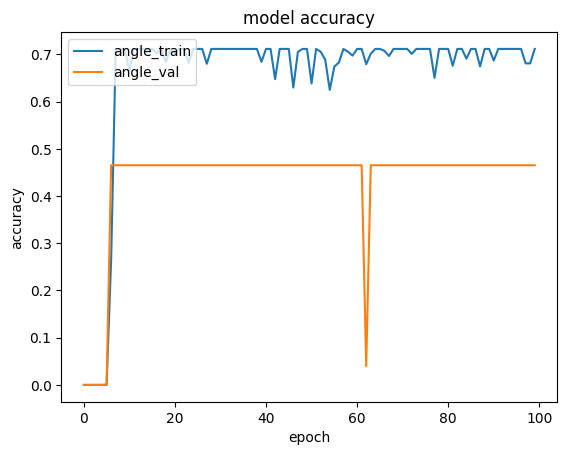

In [6]:
plt.plot(history.history['angle_accuracy'])
plt.plot(history.history['val_angle_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['angle_train', 'angle_val'], loc='upper left')
plt.show()

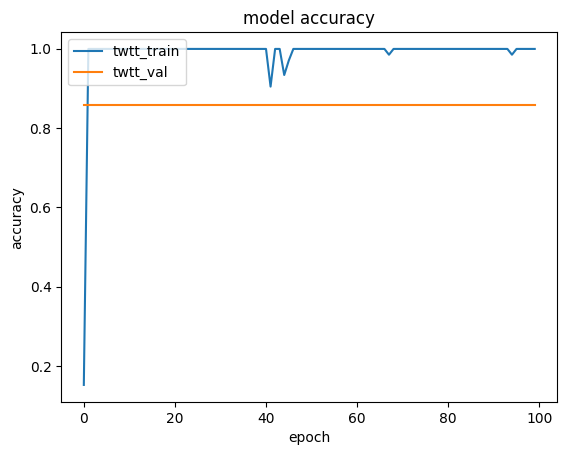

In [7]:
plt.plot(history.history['twtt_accuracy'])
plt.plot(history.history['val_twtt_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['twtt_train', 'twtt_val'], loc='upper left')
plt.show()

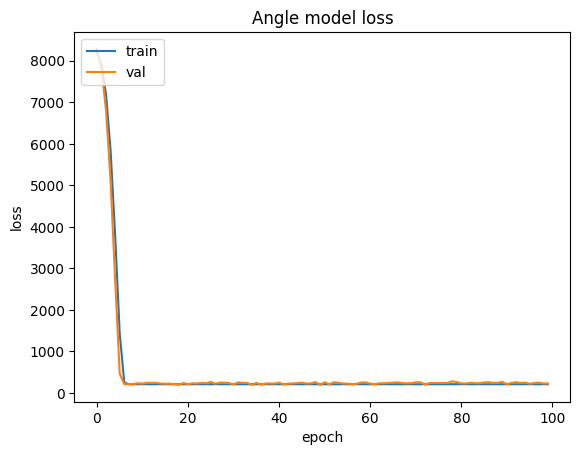

In [8]:
plt.plot(history.history['angle_loss'])
plt.plot(history.history['val_angle_loss'])
plt.title('Angle model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


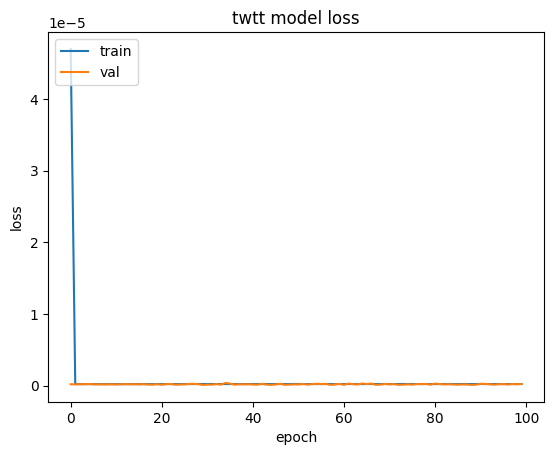

In [9]:
plt.plot(history.history['twtt_loss'])
plt.plot(history.history['val_twtt_loss'])
plt.title('twtt model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
df_binned_angles = df_binned[['angle']]
df_binned_angles = np.asarray(df_binned_angles)
df_binned_angles = df_binned_angles.reshape(435600)



df_binned_twtt = df_binned[['twoWay']]
df_binned_twtt = np.asarray(df_binned_twtt)
df_binned_twtt = df_binned_twtt.reshape(435600)


df_stave = np.asarray(df_stave)
df_stave = np.split(df_stave, binnedAmount)
df_stave = np.asarray(df_stave)
df_stave = df_stave.reshape(binnedAmount, 1,47970)


angles, twtt = model.predict(df_stave)

angles = angles.reshape(435600)
twtt = twtt.reshape(435600)

df1 = pd.DataFrame({'actual': df_binned_twtt, 'predicted': twtt})

df2 = pd.DataFrame({'actual': df_binned_angles, 'predicted': angles})


35/35 [==============================] - 0s 3ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


98.44000005722046


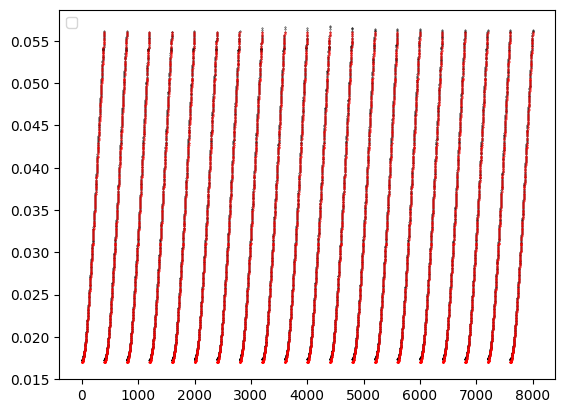

In [11]:
df1['diff'] = (df1['actual'] - df1['predicted'])
df1['diff'] = df1['diff']/df1['actual']
df1['diff'] = df1['diff']*100
df1['diff'] = df1['diff'].abs()
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

avg = df1['diff'].mean()
print(100 - avg.round(2))
df1['index'] = df1.index

df1 = df1.head(8000)
plt.scatter(df1['index'], df1['actual'], color = 'black', s=.1)
plt.scatter(df1['index'], df1['predicted'], color = 'red', s=.1)
plt.legend(loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


96.36


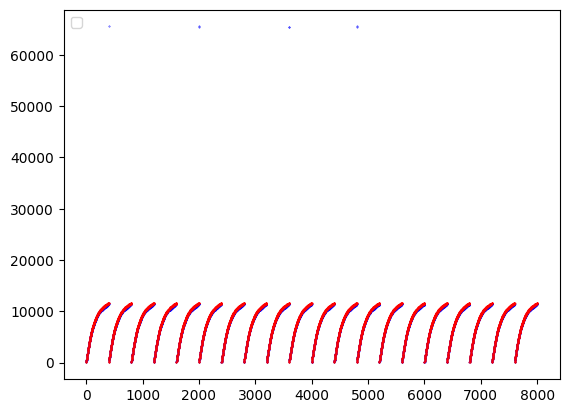

In [12]:
df2['diff'] = (df2['actual'] - df2['predicted'])
df2['diff'] = df2['diff']/df2['actual']
df2['diff'] = df2['diff']*100
df2['diff'] = df2['diff'].abs()
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)

avg = df2['diff'].mean()
print(100 - avg.round(2))
df2['index'] = df2.index

df2 = df2.head(8000)

plt.scatter(df2['index'], df2['actual'], color = 'blue', s=.1)
plt.scatter(df2['index'], df2['predicted'], color = 'red', s=.1)
plt.legend(loc='upper left')
#! Ignore the cells below they were for testing purposes

In [13]:
# model = Sequential()
# reduce_lr = ReduceLROnPlateau(monitor= 'accuracy', factor=0.5, patience=15, min_lr=1e-6, verbose=1)


# model.add(Dense(1, input_shape=(1,47970), kernel_initializer='lecun_normal', activation='selu'))
# model.add(Dense(200, kernel_initializer='lecun_normal', activation='selu',))
# model.add(Dense(100, kernel_initializer='lecun_normal', activation='selu'))

# model.add(Dense(400))

# model.summary()
# #

# model.compile(optimizer=tf.keras.optimizers.Adamax(), loss=tf.keras.losses.LogCosh(), metrics=['accuracy'])
# history = model.fit(df_stave_input, df_binned_input, epochs=80, batch_size=16 ,verbose=1, validation_split=.33 , callbacks=[reduce_lr])
# # model.save('Newmodel.h5')

In [14]:
# df_binned = np.asarray(df_binned)
# df_binned = np.split(df_binned, binnedAmount)
# df_binned = np.asarray(df_binned)

# df_binned = df_binned.reshape(binnedAmount, 1,400)

# df_stave = np.asarray(df_stave)
# df_stave = np.split(df_stave, binnedAmount)
# df_stave = np.asarray(df_stave)

# df_stave = df_stave.reshape(binnedAmount, 1,47970)

# reconstructed_model = keras.models.load_model("Newmodel.h5")

# loded_angles = reconstructed_model.predict(df_stave)

# loded_angles = loded_angles.reshape(435600)

# df_binned = df_binned.reshape(435600)



# df_load = pd.DataFrame({'predicted': loded_angles, 'actual': df_binned})




# df_load['diff'] = (df_load['actual'] - df_load['predicted'])
# df_load['diff'] = df_load['diff']/df_load['actual']
# df_load['diff'] = df_load['diff']*100
# df_load['diff'] = df_load['diff'].abs()
# df_load.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_load.dropna(inplace=True)

# avg = df_load['diff'].mean()
# print(100 - avg.round(2))
# df_load['index'] = df_load.index
# plt.scatter(df_load['index'], df_load['actual'], color = 'black', s=.5)
# plt.scatter(df_load['index'], df_load['predicted'], color = 'red', s=.5)
# plt.legend(loc='upper left')

# df_load = df_load[['predicted']]
# # df_load.to_csv('predictedBINNED01TWTT.csv', index=False)



In [15]:
reconstructed_model = keras.models.load_model("JSF_PredictionModel2.h5")
loded_angles = reconstructed_model.predict(df_stave3)

loaded_predicted = loded_angles.reshape(binned3length)

df_binned3 = df_binned3.reshape(binned3length)

df_load = pd.DataFrame({'predicted': loaded_predicted, 'actual': df_binned3})

df_load['diff'] = (df_load['actual'] - df_load['predicted'])
df_load['diff'] = df_load['diff']/df_load['actual']
df_load['diff'] = df_load['diff']*100
df_load['diff'] = df_load['diff'].abs()
df_load.replace([np.inf, -np.inf], np.nan, inplace=True)
df_load.dropna(inplace=True)

avg = df_load['diff'].mean()
print(100 - avg.round(2))
df_load['index'] = df_load.index
# plt.figure(figsize=(100,100))
plt.scatter(df_load['index'], df_load['actual'], color = 'black', s=.5)
plt.scatter(df_load['index'], df_load['predicted'], color = 'red', s=.5)
plt.legend(loc='upper left')

ValueError: in user code:

    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\luism\Projects\venv\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 47970, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float64)
      • training=False
      • mask=None
